# Course 2: linear programming
Prerequisites :
- course 1: non-linear optimization
- having read the lecture notes 


This notebook is dedicated to a particular case of constrained convex optimization where both the objective function and the constraints of the problem are linear. Specific powerful algorithms exist to solve these problems efficiently, what is seldom the case in optimization.

## Exercise 1

Consider the following LP problem:

\begin{alignat*}{3}
(\mathcal{P})\qquad\qquad \max z=4 x_1 &+3x_2 &&\\
\text{under the constraints}& &&\\
x_1& &&\leq \hphantom{1}8 \qquad (1)\\
x_1 &+2x_2 &&\leq 15 \qquad (2)\\
2x_1 &+\hphantom{2}x_2 &&\leq 18 \qquad (3)\\
& \hphantom{+\_2}x_j &&\geq \hphantom{1}0 \qquad j = 1,2.
\end{alignat*}

The problem is in *canonical form* i.e. a maximization with inequality constraints $\leq$ and positive variables.

In a general way, the problem can be written as follows:
\begin{alignat*}{3}
(\mathcal{P})\qquad\qquad \max z=c^Tx\\
\text{under the constraints}&\\
Ax &\leq b\\
\hphantom{A}x &\geq \hphantom{1}0
\end{alignat*}

Matrix $A (m\times n)$ contains the coefficients associated to *decision variables* $x$ in the constraints. Vector $c \in \mathbb{R}^n$ is the *cost vector* : the coefficients in the objective function. Vector $b \in \mathbb{R}^m$ represents the bounds of the constraints.

### 1. Set of feasible solution

The following code uses class `LPVisu()` to plot the set of feasible solutions of $(\mathcal{P})$: the set of points $(x_1,x_2)$ that satisfy all the constraints of the problem. It is a convex polyhedron, intersection of the half-spaces defined by the constraints.




<div class="alert alert-warning">
Execute the following code.   
Only one constraint has been considered. Complete matrices $A$ and $b$ in order to represent the set of feasible solutions of $(\mathcal{P})$.

</div>

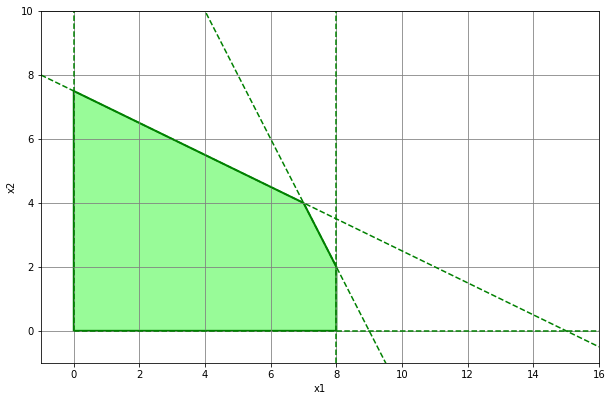

In [4]:
# Imports: for all the notebook
%matplotlib inline
from lp_visu import LPVisu
import math
import numpy as np
import numpy.linalg as npla
from scipy.optimize import linprog

# problem definition
A = [[1.0, 2.0],[2.0,1.0],[1.0,0.0]]
b = [15.0,18.0,8.0]
c = [4.0, 3.0]

x1_bounds     = (0, None)
x2_bounds     = (0, None)

# GUI bounds
x1_gui_bounds = (-1, 16)
x2_gui_bounds = (-1, 10)

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds)

A vertex of the polyhedron is a feasible point defined by the intersection of two constraints (as we are in $\mathbb{R}^2$, it would be the intersection of $n$ constraints in $\mathbb{R}^n$). These two constraints are called *active* or *binding* at this point (their slacks are equal to 0).

<div class="alert alert-warning">
For problem $(\mathcal{P})$, give the number of intersections of two constraints, and the number of vertices of the polyhedron.
</div>

Your answer:
   > Number of intersections: 7 
   
   > Number of vertices: 4 

### 2. Graphical solving

For this maximization problem, we look for the feasible point(s) $x$ that give(s) the highest value of the objective function $z=c^Tx$.

Remember that if an optimal solution exists, it is at least on one vertex of the polyhedron of feasible solutions.

<div class="alert alert-warning">
Argument `p_z` in `LPVisu()` is used to plot, for a given value $z_0$, the set of points $x$ for which $c^Tx=z_0$ (red line on the chart).  
Determine the optimal solution of $(\mathcal{P})$ by changing the value of $z_0$.
</div>

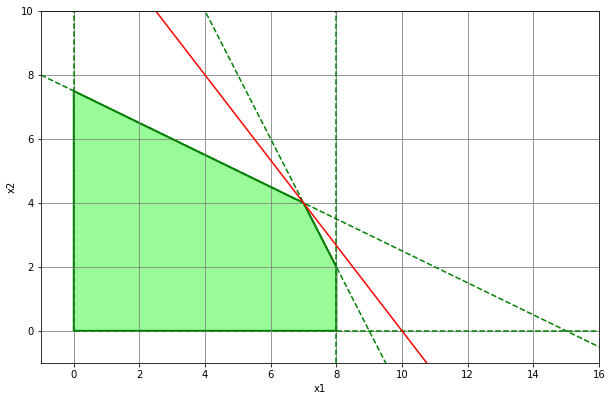

In [7]:
z0=40
visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              p_z = z0)

Your answer:
   > Optimum vertex: x1=7, x2=4
   
   > Active contraints at the optimum vertex:  x1+2x2 <=15, 2x1+x2<=18
   
   > Slacks associated to the other constraints at that point: x1<=8, slack=1
   
   > Optimum $z^*$: 40

### 3. Standard form

In the standard form, the constraints are presented as equalities. Any LP can be put in standard form.

In order to transform inequalities into equalities, we add *slack variables* to the constraints. This leads to add columns to matrix $A$. The new problem is: 

\begin{alignat*}{3}
(\mathcal{P})\qquad\qquad \max z=c^Tx\\
\text{under the constraints}&\\
Ax &= b\\
\hphantom{A}x &\geq \hphantom{1}0
\end{alignat*}

where $A$ is a ($m\times p$) matrix, $p=n+m$, and $c$ and $x$ belong to $\mathbb{R}^p$.

<div class="alert alert-warning">
In the following cell, give the modified matrix $A$ and vector $c$.
</div>

In [29]:
A = np.array([[1.0, 0.0, 1.0,0.0,0.0], 
              [1.0, 2.0, 0.0,1.0,0.0], 
              [2.0, 1.0, 0.0,0.0,1.0]])
b = np.array([8.0, 15.0, 18.0])
c = np.array([4.0, 3.0,0.0,0.0,0.0])

#### Basis, basic solutions

A set $\{A_i\ |\ i\in \beta\}$ of $m$ linearly independant columns of $A$ is a *basis* of $A$. The variables $\{x_i\ |\ i\in \beta\}$ corresponding to the indices $\beta$ of the basis are called *basic variables*. We can partition the columns of $A$ in $(B,N)$ where $B$ is the nonsingular, square matrix of the basic columns and $N$ are the nonbasic columns. Correspondingly, we partition the variables $x$ into $(x_B, x_N)$.

For any basis of $A$, the system $Ax=b$ is equivalent to $Bx_B+ Nx_N=b$. As $B$ is nonsingular, it is possible to multiply both sides by $B^{-1}$ to obtain an equivalent system: 
$$x_B =B^{-1}b-B^{-1}Nx_N$$
The system is then written in the *simplicial form* associated to $B$.

By fixing $x_N$ to 0, we obtain a *basic solution* of $(\mathcal{P})$ where $x_B =B^{-1}b$ and $x_N =0$. If $x_B\geq 0$, it is a *basic feasible solution* (*bfs*). At this point, $n$ nonbasic variables are null so $n$ constraints are active: it corresponds to a vertex of the polyhedron of feasible solutions of $(\mathcal{P})$.



#### Objective function
We use the simplicial form to rewrite the objective function $z=c^Tx=c_B^Tx_B+c_N^Tx_N$, replacing $x_B$ by its value:  

$$z=c_B^TB^{-1}b+(c_N^T-c_B^TB^{-1}N)x_N$$


At the basic solution, $x_N$ is fixed to 0. The basic variables are $x_B=B^{-1}b$ and the objective function is $z=c_B^TB^{-1}b$.



#### Initial basis

The columns added to matrix $A$ when putting the problem into standard form give a straightforward basis, called $B_0$ and the system is already in the simplicial form.

<div class="alert alert-warning">
Give the basic solution associated to $B_0$ and the value of the objective function at this point.
</div>

Your answer:
   > Basic solution x:[4 3 0 0 0]
   
   > Objective function: 4*7+3*4=28+12=40

#### Other bases

Let $B_1$ correspond to columns 1, 2 and 4 of matrix $A$. The following code computes the basic solution associated to $B_1$ and the value of z at this point.

In [30]:
# Column numbers
col = [1,2,4]

B1 = np.concatenate((A[0:,col[0]-1:col[0]],
                     A[0:,col[1]-1:col[1]],
                     A[0:,col[2]-1:col[2]]),axis=1)
print("B1=",B1)

cB1=np.concatenate((c[col[0]-1:col[0]],
                    c[col[1]-1:col[1]],
                    c[col[2]-1:col[2]]),axis=0)
print("cB1=",cB1)

xB1 = np.dot(npla.inv(B1),b)

print("xB1=",xB1)

zB1 = np.dot(cB1,xB1)
print("zB1=",zB1)

B1= [[ 1.  0.  0.]
 [ 1.  2.  1.]
 [ 2.  1.  0.]]
cB1= [ 4.  3.  0.]
xB1= [ 8.  2.  3.]
zB1= 38.0


At the basic solution associated to $B_1$, the basic variables are $x_1=8$, $x_2=2$ and $x_4=3$. Nonbasic variables $x_3=x_5=0$ are the slack variables associated to constraints (1) and (3). The basic solution is the vertex of the polyhedron intersection of these constraints. At this point, constraint (2) is not active, the slack is $x_4=3$.

<div class="alert alert-warning">

Let $B_2$ correspond to columns 1, 2 and 5 of matrix $A$. Copy and modify the code in the following cell.

Execute the code and comment the results for $B_2$.

</div>

In [32]:
### Your code
col = [1,2,5]

B2 = np.concatenate((A[0:,col[0]-1:col[0]],
                     A[0:,col[1]-1:col[1]],
                     A[0:,col[2]-1:col[2]]),axis=1)
print("B2=",B2)

cB2=np.concatenate((c[col[0]-1:col[0]],
                    c[col[1]-1:col[1]],
                    c[col[2]-1:col[2]]),axis=0)
print("cB2=",cB2)

xB2 = np.dot(npla.inv(B2),b)

print("xB2=",xB2)

zB2 = np.dot(cB2,xB2)
print("zB2=",zB2)

B2= [[ 1.  0.  0.]
 [ 1.  2.  0.]
 [ 2.  1.  1.]]
cB2= [ 4.  3.  0.]
xB2= [ 8.   3.5 -1.5]
zB2= 42.5


Your answer for $B_2$:42.5

<div class="alert alert-warning">

Let $B_3$ correspond to columns 2, 4 and 5 of matrix $A$. Copy and modify the code in the following cell.

Execute the code and comment the results for $B_3$.

</div>

In [33]:
### Your code
### Your code
col = [2,4,5]

B3 = np.concatenate((A[0:,col[0]-1:col[0]],
                     A[0:,col[1]-1:col[1]],
                     A[0:,col[2]-1:col[2]]),axis=1)
print("B3=",B3)

cB3=np.concatenate((c[col[0]-1:col[0]],
                    c[col[1]-1:col[1]],
                    c[col[2]-1:col[2]]),axis=0)
print("cB3=",cB3)

xB3 = np.dot(npla.inv(B3),b)

print("xB3=",xB3)

zB3 = np.dot(cB3,xB3)
print("zB3=",zB3)

B3= [[ 0.  0.  0.]
 [ 2.  1.  0.]
 [ 1.  0.  1.]]
cB3= [ 3.  0.  0.]


LinAlgError: Singular matrix

Your answer for $B_3$:

<div class="alert alert-warning">
How many bases may we find in matrix $A$ ? Is it consistant with the number of intersections found at question 1 ?

</div>

Your answer: 2 feasible bases / Intersections ?

### 4.The *simplex* algorithm
#### 4.1 Pivots
Suppose that you know the basic feasible solution associated to $B_0$. It is the initial point of your search for the optimal solution of ($\mathcal{P}$).

The constraints are:
$$
\begin{bmatrix}
1 & 0 & 1 & 0 & 0\\
1 & 2 & 0 & 1 & 0\\
2 & 1 & 0 & 0 & 1
\end{bmatrix}
\times
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
x_5
\end{bmatrix}
=
\begin{bmatrix}
8\\
15\\
18
\end{bmatrix}
$$

$B_0$ corresponds to columns 3, 4 and 5 of matrix $A$. At the basic solution, nonbasic variables $x_1=x_2=0$. As the problem is already in simplicial form, we get directly $x_3=8$, $x_4=15$ and $x_4=18$. The basic variables are not negative so the solution is feasible.

In the same way, let us write the objective function:
$$
\begin{bmatrix}
4 & 3 & 0 & 0 & 0
\end{bmatrix}
\times
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
x_5
\end{bmatrix}
=\ \ z\ \ 
$$

At the basic solution associated to $B_0$, nonbasic variables $x_1$ and $x_2$ are forced to $0$ so $z=0$. However, if the value of $x_1$ or $x_2$ increase, as their coefficients are positive in $c$, the value of $z$ also increases. 
If it is possible to increase $x_1$ or $x_2$ and remain in the set of feasible solutions, the current solution is not the optimum. There may be another vertex that gives a better value of $z$ than the current one.

The *pivot* operation consists of swapping a nonbasic and a basic variable in order to change the current vertex of the polyhedron, while guaranteeing an increase of the objective function. To that aim, we first choose the variable that will enter the basis among the nonbasic variables with a positive coefficient in vector $c$. Increasing the value of this variable may decrease the value of current basic variables. To remain in the feasible space, we stop as soon as one basic variable reaches zero: this variable leaves the basis.

The problem is written in the simplicial form associated to the new basis in order to check if the current solution is optimal or not. The new coefficients of the nonbasic variables, called *reduced costs*, must be negative or null. Otherwise the current vertex is not the optimum and new pivots must be performed until the best solution is reached.

This solution approach is called the [*simplex algorithm*](https://en.wikipedia.org/wiki/Simplex_algorithm). It has been proposed by Georges Dantzig in the 1940's.

<div class="alert alert-warning">
Solve the problem manually with the simplex algorithm. Start at the basic solution associated to $B_0$.
</div>

#### 4.2 Solution with `scipy`

The `scipy` librairy provides a function called `linprog()` to solve linear programming problems. Please refer to the [documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) for details.

The following code presents how to solve problem ($\mathcal{P}$) with this function. The problem is written in canonical form but it could also be in standard form, as `linprog()` accepts both equality and inequality constraints. We use function `lp_simple_callback()` to follow graphically the iterations (argument `xk` of `LPVisu()` is used to visualize the current solution).

The first argument given to `linprog()` is `-c`, as this function performs a minimization. Maximizing $z=c^Tx$ is equivalent to minimizing $-z=-c^Tx$.

current iteration: 0
current tableau: 
[[  1.   0.   1.   0.   0.   8.]
 [  1.   2.   0.   1.   0.  15.]
 [  2.   1.   0.   0.   1.  18.]
 [ -4.  -3.   0.   0.   0.   0.]]
current indices: [2 3 4]
current pivot: (0, 0)
current solution: [ 0.  0.]


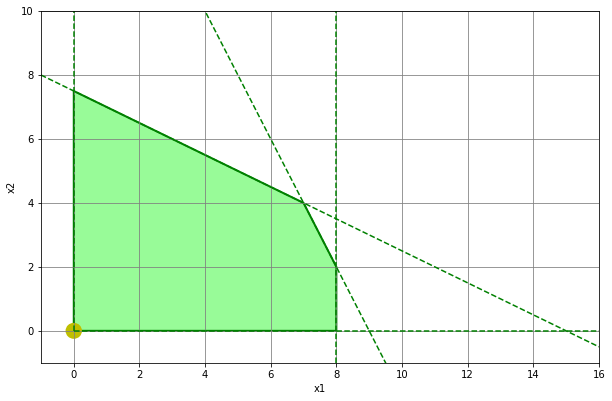

current iteration: 1
current tableau: 
[[  1.   0.   1.   0.   0.   8.]
 [  0.   2.  -1.   1.   0.   7.]
 [  0.   1.  -2.   0.   1.   2.]
 [  0.  -3.   4.   0.   0.  32.]]
current indices: [0 3 4]
current pivot: (2, 1)
current solution: [ 8.  0.]


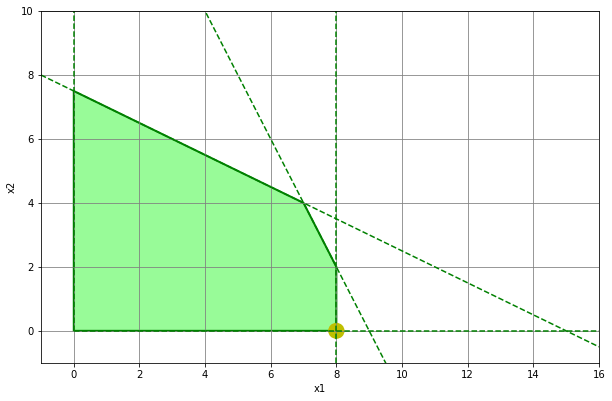

current iteration: 2
current tableau: 
[[  1.   0.   1.   0.   0.   8.]
 [  0.   0.   3.   1.  -2.   3.]
 [  0.   1.  -2.   0.   1.   2.]
 [  0.   0.  -2.   0.   3.  38.]]
current indices: [0 3 1]
current pivot: (1, 2)
current solution: [ 8.  2.]


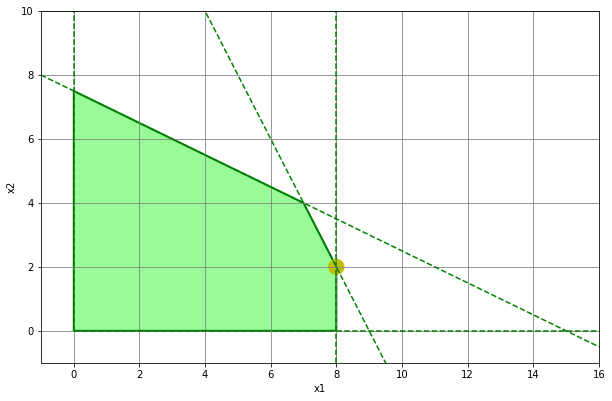

current iteration: 3
current tableau: 
[[  1.           0.           0.          -0.33333333   0.66666667   7.        ]
 [  0.           0.           1.           0.33333333  -0.66666667   1.        ]
 [  0.           1.           0.           0.66666667  -0.33333333   4.        ]
 [  0.           0.           0.           0.66666667   1.66666667  40.        ]]
current indices: [0 2 1]
current pivot: (nan, nan)
current solution: [ 7.  4.]


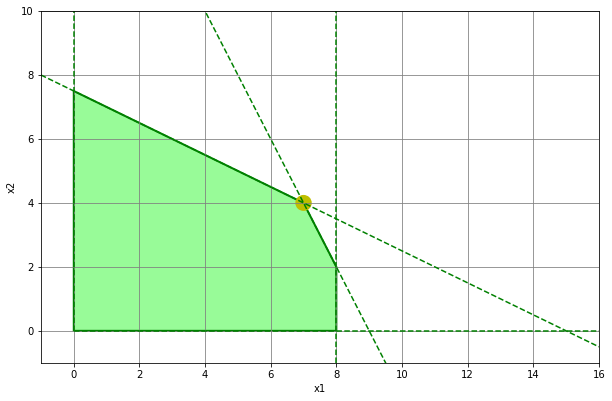

Optimization terminated successfully.
         Current function value: -40.000000  
         Iterations: 3
     fun: -40.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 1.,  0.,  0.])
  status: 0
 success: True
       x: array([ 7.,  4.])


In [15]:
# problem definition
A = [[1.0, 0.0], 
     [1.0, 2.0], 
     [2.0, 1.0]]
b = [8.0, 15.0, 18.0]
c = np.array([4.0, 3.0])

x1_bounds     = (0, None)
x2_bounds     = (0, None)

# GUI bounds
x1_gui_bounds = (-1, 16)
x2_gui_bounds = (-1, 10)

def lp_simple_callback(xk, **kwargs):
    """A simple callback function to see what is happening to print each
    step of the algorithm and to use the visualization.

    """

    if  not (kwargs["nit"]==0 and math.isnan(kwargs["pivot"][0])):
        print("current iteration: " + str(kwargs["nit"]))
        print("current tableau: \n" + str(kwargs["tableau"]))
        print("current indices: "   + str(kwargs["basis"]))
        print("current pivot: "     + str(kwargs["pivot"]))
        print("current solution: "  + str(xk))
        visu = LPVisu(A, b, c,
                      x1_bounds, x2_bounds,
                      x1_gui_bounds, x2_gui_bounds,
                      p_xk = xk)

# solve the problem
res = linprog(-c, A_ub=A, b_ub=b, bounds = (x1_bounds, x2_bounds),
              method='simplex',
              callback=lp_simple_callback,
              options={"disp": True})
print(res)

<div class="alert alert-warning">
Execute the code.  
Compare the path followed by `linprog()`with yours.
<div class>

### Solution strategy

The computation time depends on the number of iterations (pivots) to reach the optimum solution. The algorithm guidance performs a choice within the variables candidate to enter the basis in order to minimize the number of iterations. Two heuristics are traditionnally used:
* Selection of the variable with the best reduced cost. It selects the closest direction to the gradient.
* Selection of the variable that leads to the vertex with the best value of $z$. 


<div class="alert alert-warning">
Compare the two heuristics for the solution of ($\mathcal{P}$).

Is there a better path to reach the optimum solution ?
<div class>

Your answer : Depends on the number of variables 

## Exercise 2: manufacturing of a stainless steel

[Prins & Sevaux 2011]

The MAE company received an order of 5 tons of special steel for the manufacture of boat hulls. This steel must have particular characteristics given in Table 1 below:

** Table 1: Composition of the steel **

| Chemical element | Minimum percentage  | Maximum percentage  |
|------------------|:-------------------:|:-------------------:|
| Carbon (C)       | 2                   | 3                   |
| Copper (Cu)      | 0,4                 | 0,6                 |
| Manganese (Mn)   | 1,2                 | 1,65                |

To make this steel, MAE has seven raw materials. The characteristics, availability and purchasing costs are given in Table 2 below.

** Table 2: Composition, inventory level and cost of raw materials **

| Raw material       |  C% | Cu%  | Mn% | Inventory (tons)   | cost (€/ton) |
|--------------------|:---:|:----:|:---:|:----------------:|:-----------:|
| Ferroalloy #1      | 2,5 | 0    | 1,3 | 4                | 1200        |
| Ferroalloy #2      | 3   | 0    | 0,8 | 3                | 1500        |
| Ferroalloy #3      | 0   | 0,3  | 0   | 6                | 900         |
| Copper alloy #1    | 0   | 90   | 0   | 5                | 1300        |
| Copper alloy #2    | 0   | 96   | 4   | 2                | 1450        |
| Aluminium alloy #1 | 0   | 0,4  | 1,2 | 3                | 1200        |
| Aluminium alloy #2 | 0   | 0,6  | 0   | 2.5              | 1000        |

We want to determine the composition of the steel in order to minimize production costs.

<div class="alert alert-warning">
Model the problem as a linear programming problem.

> Choose the decision variables- F1,F2,F3,C1,C2,A1,A2   %C - x1 , %Cu - x2, %Mn - x3

> Write the constrainst and the objective function
Objective function minimizing costs, 
2 <= 2.5 F1 + 3 F2 + 0 F3 + 0 C1 + 0 C2 + 0 A1 + 0 A2 <= 3
0.4 <= 0 F1 + 0 F2 + 0.3 F3 + 90 C1 + 96 C2 + 0.4 A1 + 0.6 A2 <= 0.6
1.2 <= 1.3 F1 + 0.8 F2 + 0 F3 + 0 C1 + 4 C2 + 1.2 A1 + 0 A2 <= 1.65
F1<=4
F2<=3
F3<=6
C1<=5
C2<=2
A1<=3
A2<=2.5
F1+F2+F3+C1+C2+A1+A2<=5
Minimize= 1200 F1 + 1500 F2 + 900 F3 + 1300 C1 + 1450 C2 + 1200 A1 + 1000 A2

Solve the problem using `linprog()`

Parameters (A_eq,b_eq) can be used to define equality constraints.

Bounds on the values of the variables can be defined with parameter "bounds" (see linprog [documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) for details).

<div class>

Model:

> Description of the variables: 

> Constraints:

> Objective function:

<div class="alert alert-warning">
Solve the problem using `linprog()`.
<div class>

In [17]:
### Your code
# Imports: for all the notebook
%matplotlib inline
from lp_visu import LPVisu
import math
import numpy as np
import numpy.linalg as npla
from scipy.optimize import linprog

# problem definition
A = [[1.0, 0.0,0.0,0.0,0.0,0.0,0.0],
     [0.0, 1.0,0.0,0.0,0.0,0.0,0.0], 
     [0.0, 0.0,1.0,0.0,0.0,0.0,0.0],
     [0.0, 0.0,0.0,1.0,0.0,0.0,0.0],
     [0.0, 0.0,0.0,0.0,1.0,0.0,0.0],
     [1.0, 0.0,0.0,0.0,0.0,1.0,0.0],
     [1.0, 0.0,0.0,0.0,0.0,0.0,1.0],
     [1.0, 1.0,1.0,1.0,1.0,1.0,1.0],
     [2.5, 3.0,0.0,0.0,0.0,0.0,1.0],
     [0.0, 0.0,0.3,90.0,96.0,0.4,0.6],
     [1.3, 0.8,0.0,0.0,4.0,1.2,1.0],
     [-2.5, -3.0,0.0,0.0,0.0,0.0,-1.0],
     [0.0, 0.0,-0.3,-90.0,-96.0,-0.4,-0.6],
     [-1.3, -0.8,0.0,0.0,-4.0,-1.2,-1.0]
     ]
b = [4.0, 3.0, 6.0,5.0,2.0,3.0,2.5,5.0,3.0,0.6,1.65,2.0,0.4,1.2]
c = np.array([1200.0, 1500.0,900.0,1300.0,1450.0,1200.0,1000.0])

x1_bounds     = (0, None)
x2_bounds     = (0, None)
x3_bounds     = (0, None)
x4_bounds     = (0, None)
x5_bounds     = (0, None)
x6_bounds     = (0, None)
x7_bounds     = (0, None)

# GUI bounds
x1_gui_bounds = (-1, 16)
x2_gui_bounds = (-1, 10)
x3_gui_bounds = (-1, 16)
x4_gui_bounds = (-1, 10)
x5_gui_bounds = (-1, 16)
x6_gui_bounds = (-1, 10)
x7_gui_bounds = (-1, 16)


def lp_simple_callback(xk, **kwargs):
    """A simple callback function to see what is happening to print each
    step of the algorithm and to use the visualization.

    """

    if  not (kwargs["nit"]==0 and math.isnan(kwargs["pivot"][0])):
        print("current iteration: " + str(kwargs["nit"]))
        print("current tableau: \n" + str(kwargs["tableau"]))
        print("current indices: "   + str(kwargs["basis"]))
        print("current pivot: "     + str(kwargs["pivot"]))
        print("current solution: "  + str(xk))
#        visu = LPVisu(A, b, c,
#                      x1_bounds, x2_bounds,x3_bounds,x4_bounds,x5_bounds,x6_bounds,x7_bounds,
#                    x1_gui_bounds, x2_gui_bounds,
#                     p_xk = xk)

# solve the problem
res = linprog(c, A_ub=A, b_ub=b, bounds = (x1_bounds, x2_bounds,x3_bounds,x4_bounds,x5_bounds,x6_bounds,x7_bounds),
              method='simplex',
              callback=lp_simple_callback,
              options={"disp": True})
print(res)

Optimization terminated successfully.
         Current function value: -0.000000   
         Iterations: 0
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([ 4.  ,  3.  ,  6.  ,  5.  ,  2.  ,  3.  ,  2.5 ,  5.  ,  3.  ,
        0.6 ,  1.65,  2.  ,  0.4 ,  1.2 ])
  status: 0
 success: True
       x: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.])


Results:

> Optimum solution: 

